In [33]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import pandas as pd

In [34]:
df = pd.read_csv(Path('na_storms_summary.csv'))
df = df.fillna("NA")
df.head()

,Unnamed: 0,NUMBER,NAME,SEASON_Year,ISO_TIME,NATURE,LAT,LON,WMO_WIND_KTS,WMO_PRES,STORM_SPEED_KTS,STORM_DIR_degrees,geohash,geohash2,Strike_Target
0,0,20,ALBERTO,2012,5/19/2012 0:00,DS,33.1,-77.0,25,1010,3,196,dmchr,dm,1.0
1,1,2,ALEX,2016,1/10/2016 0:00,ET,34.4,-54.2,65,981,16,119,dy17w,dy,0.0
2,2,47,ALICIA,1983,8/15/1983 12:00,TS,27.3,-90.5,30,1009,5,258,9uzek,9u,0.0
3,3,57,ALLEN,1980,7/31/1980 12:00,NR,11.0,-30.0,25,,22,267,e3fwt,e3,0.0
4,4,27,ALLISON,1995,6/10/1995 0:00,ET,57.0,-52.0,40,997,36,360,ff5h2,ff,1.0


In [35]:
df.dtypes

Unnamed: 0             int64
NUMBER                 int64
NAME                  object
SEASON_Year            int64
ISO_TIME              object
NATURE                object
LAT                  float64
LON                  float64
WMO_WIND_KTS          object
WMO_PRES              object
STORM_SPEED_KTS        int64
STORM_DIR_degrees      int64
geohash               object
geohash2              object
Strike_Target        float64
dtype: object

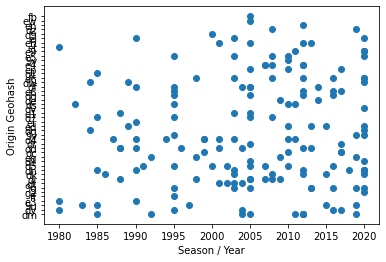

In [137]:
plt.scatter(df.SEASON_Year, df.geohash2)
plt.xlabel('Season / Year')
plt.ylabel('Origin Geohash')
plt.show()

In [95]:
from sklearn.preprocessing import LabelEncoder

df_enc = df.select_dtypes(exclude=['number']) \
       .apply(LabelEncoder().fit_transform) \
       .join(df.select_dtypes(include=['number']))
df_enc

,NAME,ISO_TIME,NATURE,WMO_WIND_KTS,WMO_PRES,geohash,geohash2,Unnamed: 0,NUMBER,SEASON_Year,LAT,LON,STORM_SPEED_KTS,STORM_DIR_degrees,Strike_Target
0,0,78,0,6,11,99,18,0,20,2012,33.1,-77.0,3,196,1.0
1,1,1,1,14,25,118,25,1,2,2016,34.4,-54.2,16,119,0.0
2,2,114,4,7,10,12,1,2,47,1983,27.3,-90.5,5,258,0.0
3,3,105,2,6,0,129,28,3,57,1980,11.0,-30.0,22,267,0.0
4,4,84,1,9,36,172,43,4,27,1995,57.0,-52.0,36,360,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,170,132,2,0,0,152,33,170,72,2020,14.0,-18.0,12,276,0.0
171,171,29,4,13,30,170,41,171,93,2005,34.3,-18.3,7,74,0.0
172,172,136,2,0,0,145,32,172,74,2020,8.7,-17.4,8,277,0.0
173,173,54,1,9,30,171,42,173,97,2005,45.5,-52.0,22,79,1.0


In [111]:
Y = df_enc["Strike_Target"]

# X = df_enc.drop(columns="Strike_Target")
X = df_enc.drop(columns="Strike_Target")

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   Y, random_state=1, stratify=Y)

In [113]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=500,
   random_state=1)

In [114]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=1)

In [115]:
y_pred = classifier.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6363636363636364


In [130]:
df3 = df_enc.drop(columns=["NAME", "NATURE"])
df3

,ISO_TIME,WMO_WIND_KTS,WMO_PRES,geohash,geohash2,Unnamed: 0,NUMBER,SEASON_Year,LAT,LON,STORM_SPEED_KTS,STORM_DIR_degrees,Strike_Target
0,78,6,11,99,18,0,20,2012,33.1,-77.0,3,196,1.0
1,1,14,25,118,25,1,2,2016,34.4,-54.2,16,119,0.0
2,114,7,10,12,1,2,47,1983,27.3,-90.5,5,258,0.0
3,105,6,0,129,28,3,57,1980,11.0,-30.0,22,267,0.0
4,84,9,36,172,43,4,27,1995,57.0,-52.0,36,360,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,132,0,0,152,33,170,72,2020,14.0,-18.0,12,276,0.0
171,29,13,30,170,41,171,93,2005,34.3,-18.3,7,74,0.0
172,136,0,0,145,32,172,74,2020,8.7,-17.4,8,277,0.0
173,54,9,30,171,42,173,97,2005,45.5,-52.0,22,79,1.0


In [131]:
Y = df3["Strike_Target"]

# X = df3.drop(columns="Strike_Target")
X = df3.drop(columns="Strike_Target")

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   Y, random_state=1, stratify=Y)

In [133]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=500,
   random_state=1)

In [134]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=1)

In [135]:
y_pred = classifier.predict(X_test)

In [136]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6590909090909091
